In [1]:
import pandas as pd
from scipy import stats

In [2]:
correlation ={}
P ={}
Thereshold = 0.05/27 # Bonferroni correction for multiple (27) hypothesis test each with 0.05 significance level
Passed = []
round(Thereshold,4)

0.0019

## NIH correlation Sex

In [3]:
WantX_NIH = pd.read_csv("./NIH/results/WantX.csv")


In [4]:
print("correlation coefficient per subgrpus")
print("NIH-Male Corr:",stats.pearsonr(WantX_NIH["Gap_M_mean"], WantX_NIH["%M"]))
print("NIH-Female Corr:",stats.pearsonr(WantX_NIH["Gap_F_mean"], WantX_NIH["%F"]) )     

corr = stats.pearsonr(WantX_NIH["Gap_F_mean"], WantX_NIH["%F"])

correlation coefficient per subgrpus
NIH-Male Corr: (0.3049490702561459, 0.2890753869685472)
NIH-Female Corr: (0.3049490702561458, 0.2890753869685472)


In [5]:
print("correlation coefficient per subgrous")
GAPs = {"Gap_M_mean":"%M"}
preferred_name = {"%M":"Male"}
for key, values in GAPs.items():
    noNAN = WantX_NIH[[key,values]].dropna(subset=[key])
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    groupname = "NIH:"+preferred_name[values]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = round(corr[1],4)
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+"Pass the test")
    print("NIH "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

correlation coefficient per subgrous
NIH M Corr: (0.3049490702561459, 0.2890753869685472)


In [6]:
correlation

{'NIH:Male': 0.3049}

In [7]:
# print("correlation coefficient per all subgrpus aggregation")

# df_sex_NIH = pd.DataFrame(columns =["%","Gap"])
# for key, values in GAPs.items():
#     noNAN = WantX_NIH[[key,values]].dropna(subset=[key]).rename(columns={key:"Gap",values:"%"})
#     df_sex_NIH = df_sex_NIH.append(noNAN,ignore_index=True)
#     corr = stats.pearsonr(df_sex_NIH["Gap"], df_sex_NIH["%"])
#     groupname = "CXR "+values[1:]
#     correlation[groupname] = corr[0]
#     P[groupname] = corr[1]

# print("NIH-All Sex Corr:",stats.pearsonr(df_sex_NIH["Gap"], df_sex_NIH["%"]) )

## NIH correlation Age

In [8]:
WantAge_NIH = pd.read_csv("./NIH/results/WantAge.csv")


In [9]:
GAPs = {"Gap_40-60_mean":"%40-60", "Gap_60-80_mean":"%60-80","Gap_20-40_mean":"%20-40","Gap_80-_mean":"%80-","Gap_0-20_mean":"%0-20"}
preferred_name = {"%M":"Male"}
for key, values in GAPs.items():
    noNAN = WantAge_NIH[[key,values]].dropna(subset=[key])
    
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    groupname = "NIH:"+values[1:]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = round(corr[1],4)
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+"Pass the test")
    print("NIH "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

NIH 40-60 Corr: (-0.21969718921050338, 0.450438223485337)
NIH 60-80 Corr: (0.11646172362182862, 0.6917463497740126)
NIH 20-40 Corr: (0.30817646107122176, 0.30564710401382394)
NIH 80- Corr: (0.13746548825616708, 0.6869080834307257)
NIH 0-20 Corr: (0.025153878762898253, 0.9349911622253049)


In [10]:
P

{'NIH:Male': 0.2891,
 'NIH:40-60': 0.4504,
 'NIH:60-80': 0.6917,
 'NIH:20-40': 0.3056,
 'NIH:80-': 0.6869,
 'NIH:0-20': 0.935}

In [11]:
correlation

{'NIH:Male': 0.3049,
 'NIH:40-60': -0.2197,
 'NIH:60-80': 0.1165,
 'NIH:20-40': 0.3082,
 'NIH:80-': 0.1375,
 'NIH:0-20': 0.0252}

## CXP correlation Sex

In [12]:
WantX_CXP = pd.read_csv("./CXP/results/WantX.csv")

In [13]:
print("correlation coefficient per subgrous")
GAPs = {"Gap_M_mean":"%M"}
for key, values in GAPs.items():
    noNAN = WantX_CXP[[key,values]].dropna(subset=[key])
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    groupname = "CXP:"+preferred_name[values]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = round(corr[1],4)
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+"Pass the test")
    print("CXP "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

correlation coefficient per subgrous
CXP M Corr: (0.36570523245472086, 0.19848721424802304)


In [14]:
P

{'NIH:Male': 0.2891,
 'NIH:40-60': 0.4504,
 'NIH:60-80': 0.6917,
 'NIH:20-40': 0.3056,
 'NIH:80-': 0.6869,
 'NIH:0-20': 0.935,
 'CXP:Male': 0.1985}

## CXP correlation Age

In [15]:
WantAge_CXP = pd.read_csv("./CXP/results/WantAge.csv")

In [16]:
print("correlation coefficient per subgrpus")
GAPs = {"Gap_40-60_mean":"%40-60", "Gap_60-80_mean":"%60-80","Gap_20-40_mean":"%20-40","Gap_80-_mean":"%80-","Gap_0-20_mean":"%0-20"}

for key, values in GAPs.items():
    noNAN = WantAge_CXP[[key,values]].dropna(subset=[key])
    
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    groupname = "CXP:"+values[1:]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = round(corr[1],4)
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+"Passed the test")
    print("CXP "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

correlation coefficient per subgrpus
CXP 40-60 Corr: (0.30304156759183426, 0.2922551829232988)
CXP:60-80Passed the test
CXP 60-80 Corr: (0.8528272494492379, 0.00010602245560994435)
CXP 20-40 Corr: (0.5087686313077648, 0.06318514980585116)
CXP 80- Corr: (0.7355173398094695, 0.002717373065316159)
CXP 0-20 Corr: (0.44586751920297113, 0.11006282146974763)


In [17]:
Passed

['CXP:60-80']

## CXR correlation Sex

In [18]:
WantX_MIMIC = pd.read_csv("./MIMIC/results/WantX.csv")

In [19]:
print("correlation coefficient per subgrous")
GAPs = {"Gap_M_mean":"%M"}
for key, values in GAPs.items():
    noNAN = WantX_MIMIC[[key,values]].dropna(subset=[key])
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    groupname = "CXR:"+preferred_name[values]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = round(corr[1],4)
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+" Pass the test")
    print("CXR "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

correlation coefficient per subgrous
CXR:Male Pass the test
CXR M Corr: (0.8077539996702258, 0.0004749687974687889)


## CXR correlation Age

In [20]:
WantAge_CXR = pd.read_csv("./MIMIC/results/WantAge.csv")

In [21]:
print("correlation coefficient per subgrpus")
GAPs = {"Gap_40-60_mean":"%40-60", "Gap_60-80_mean":"%60-80","Gap_20-40_mean":"%20-40","Gap_80-_mean":"%80-","Gap_0-20_mean":"%0-20"}

for key, values in GAPs.items():
    noNAN = WantAge_CXR[[key,values]].dropna(subset=[key])
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    groupname = "CXR:"+values[1:]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = corr[1]
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+"Passed the test")
    print("CXR "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

correlation coefficient per subgrpus
CXR 40-60 Corr: (0.44964895936463267, 0.10671871412969945)
CXR:60-80Passed the test
CXR 60-80 Corr: (0.9053141974269918, 8.460752146232555e-06)
CXR:20-40Passed the test
CXR 20-40 Corr: (0.9069649401020444, 7.641425116904771e-06)
CXR 80- Corr: (0.6771883315773706, 0.007802708298002291)
CXR 0-20 Corr: (0.6508341913580221, 0.01599162299110856)


In [22]:
Thereshold

0.001851851851851852

## CXR correlation Race

In [23]:
WantRace_CXR = pd.read_csv("./MIMIC/results/WantR.csv")

In [24]:
[WantRace_CXR.head(0)]

[Empty DataFrame
 Columns: [Unnamed: 0, diseases, diseases_abbr, Distance, %White, Gap_W_mean, CI_W, %Black, Gap_B_mean, CI_B, %Hisp, Gap_H_mean, CI_H, %Other, Gap_Ot_mean, CI_Ot, %Asian, Gap_As_mean, CI_As, %American, Gap_Am_mean, CI_Am]
 Index: []
 
 [0 rows x 22 columns]]

In [25]:
print("correlation coefficient per subgrpus")
GAPs = {"Gap_W_mean":"%White", "Gap_B_mean":"%Black","Gap_H_mean":"%Hisp",
        "Gap_Ot_mean":"%Other","Gap_As_mean":"%Asian","Gap_Am_mean":"%American"}
preferred_name = {"%M":"Male", "%American":"Native"}
for key, values in GAPs.items():
    noNAN = WantRace_CXR[[key,values]].dropna(subset=[key])
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    if values == "%American":
        groupname = "CXR:"+preferred_name[values]
    else:
        groupname = "CXR:"+values[1:]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = round(corr[1],4)
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+" Pass the test")
    print("CXR "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

correlation coefficient per subgrpus
CXR White Corr: (0.7093631262297995, 0.004493752613664629)
CXR Black Corr: (0.6640933593271126, 0.009591971631078576)
CXR Hisp Corr: (0.45954159226369007, 0.09830215271911284)
CXR Other Corr: (0.6441131792864936, 0.012912954042500096)
CXR Asian Corr: (0.1831157341307852, 0.5309141560884056)
CXR American Corr: (0.5955530532997229, 0.09062235418463929)


In [26]:
Passed

['CXP:60-80', 'CXR:Male', 'CXR:60-80', 'CXR:20-40']

In [27]:
correlation

{'NIH:Male': 0.3049,
 'NIH:40-60': -0.2197,
 'NIH:60-80': 0.1165,
 'NIH:20-40': 0.3082,
 'NIH:80-': 0.1375,
 'NIH:0-20': 0.0252,
 'CXP:Male': 0.3657,
 'CXP:40-60': 0.303,
 'CXP:60-80': 0.8528,
 'CXP:20-40': 0.5088,
 'CXP:80-': 0.7355,
 'CXP:0-20': 0.4459,
 'CXR:Male': 0.8078,
 'CXR:40-60': 0.4496,
 'CXR:60-80': 0.9053,
 'CXR:20-40': 0.907,
 'CXR:80-': 0.6772,
 'CXR:0-20': 0.6508,
 'CXR:White': 0.7094,
 'CXR:Black': 0.6641,
 'CXR:Hisp': 0.4595,
 'CXR:Other': 0.6441,
 'CXR:Asian': 0.1831,
 'CXR:Native': 0.5956}

## CXR correlation Insurance

In [28]:
WantInsurance_CXR = pd.read_csv("./MIMIC/results/WantI.csv")


In [29]:
Thereshold

0.001851851851851852

In [30]:
print("correlation coefficient per subgrpus")
GAPs = {"Gap_C_mean":"%Medicare", "Gap_O_mean":"%Other","Gap_A_mean":"%Medicaid"}
preferred_name = {"%M":"Male", "%American":"Native","%Other":"%OtherIns." }

for key, values in GAPs.items():
    noNAN = WantInsurance_CXR[[key,values]].dropna(subset=[key])
    corr = stats.pearsonr(noNAN[key], noNAN[values])
    if values == "%Other":
        groupname = "CXR:"+preferred_name[values]
    else:
        groupname = "CXR:"+values[1:]
    correlation[groupname] = round(corr[0],4)
    P[groupname] = round(corr[1],4)
    if round(corr[1],4) <=Thereshold:
        Passed.append(groupname)
        print(groupname+"Passed the test")
    print("CXR "+values[1:]+ " Corr:",stats.pearsonr(noNAN[key], noNAN[values]) )

correlation coefficient per subgrpus
CXR:MedicarePassed the test
CXR Medicare Corr: (0.8428107179518548, 0.00015383746091124088)
CXR Other Corr: (0.35426882001376375, 0.21395421080581564)
CXR Medicaid Corr: (0.1635727506590609, 0.5763272665937798)


In [31]:
len(P)

27

In [32]:
len(P)

27

In [33]:
import matplotlib.pyplot as plt
groups = []
Pvalues = []
plt.figure(figsize=(16,3))
for key, values in sorted(P.items(), key=lambda item: item[1]):
    groups.append(key)
    Pvalues.append(values)
    
myplot = plt.scatter(groups, Pvalues)
plt.axhline(y=Thereshold,ls='--')
for item in myplot.axes.get_xticklabels():
    item.set_rotation(90)
plt.scatter(groups, Pvalues)    
Passed    

['CXP:60-80', 'CXR:Male', 'CXR:60-80', 'CXR:20-40', 'CXR:Medicare']

CXR:20-40 7.641425116904771e-06
0.907
CXR:60-80 8.460752146232555e-06
0.9053
CXP:60-80 0.0001
0.8528
CXR:Medicare 0.0002
0.8428
CXR:Male 0.0005
0.8078


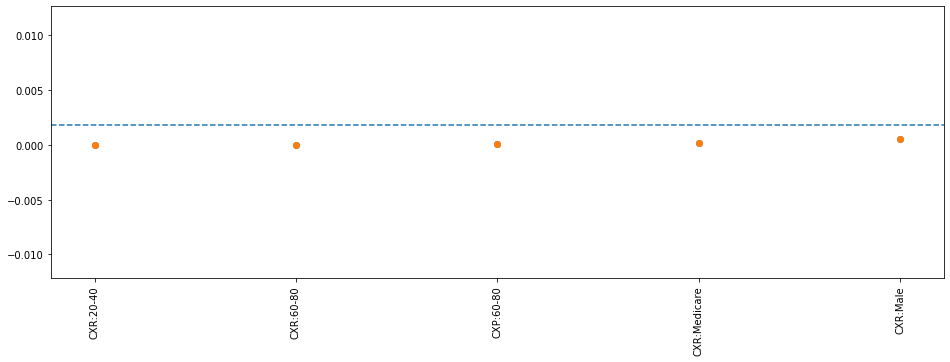

In [36]:
import matplotlib.pyplot as plt
passed_dic ={}
groups = []
Pvalues = []
plt.figure(figsize=(16,5))
for key, values in sorted(P.items(), key=lambda item: item[1]):
    if values<Thereshold:
        passed_dic = P.items()
        groups.append(key)
        Pvalues.append(values)
        print(key,values)
        print(correlation[key])
        
    
myplot = plt.scatter(groups, Pvalues)
plt.axhline(y=Thereshold,ls='--')
for item in myplot.axes.get_xticklabels():
    item.set_rotation(90)
plt.scatter(groups, Pvalues)    
 